<a href="https://colab.research.google.com/github/bhuwan1998/Python_Tutorials/blob/master/nerual_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd


In [4]:
#load the data 
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [8]:
#explore the data 
print("X_train - type",type(x_train))
print("X test - type", type(x_test))
print("Y-train - type", type(y_train))
print("Y-test - type", type(y_test))

X_train - type <class 'numpy.ndarray'>
X test - type <class 'numpy.ndarray'>
Y-train - type <class 'numpy.ndarray'>
Y-test - type <class 'numpy.ndarray'>


We can see from the code above that all the values are a numpy array and in the next section we will see how shapes differ.

In [10]:
print("X_train - ",x_train.shape)
print("X test - ", x_test.shape)
print("Y-train - ", y_train.shape)
print("Y-test - ",y_test.shape)

X_train -  (50000, 32, 32, 3)
X test -  (10000, 32, 32, 3)
Y-train -  (50000, 1)
Y-test -  (10000, 1)


<h2 >x-train and x-test are 4 dimensional arrays </h2>

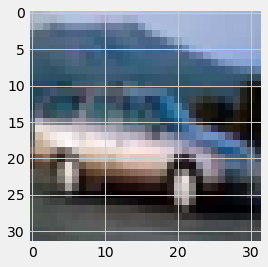

In [23]:
index = 4
x_train[index]
img = plt.imshow(x_train[index]) 
#outputting an image from sequence of pixel values

In [24]:
print("Image label is", y_train[index])

Image label is [1]


In [33]:
#now we create an array of different labels or categories that are possible 
classification = ['airplane','automobile', 'bird', 'cat'
                  , 'dog', 'frog', 'horse', 'ship', 'truck']
print("The image class is:", classification[y_train[index][0]])

The image class is: automobile


In [34]:
#using one hot encoding we can classify elements 
#we only need to do this for y values 
#y values are the ones that have the classification labels in a way 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [35]:
#normalise the pixels in the image 
# we are using sRGB which can have 255 different possibilities 
#therefore we divide by 255 for x_train and x_test
x_train = x_train/255
x_test = x_test/255

In [41]:
#now we make the convolutional neural network 
model = Sequential()
#we make a sequential object 

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
#relu stands for rectified linear unit 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])



In [42]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs=10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 81s 2ms/step - loss: 1.8119 - accuracy: 0.3138 - val_loss: 1.5648 - val_accuracy: 0.4308
Epoch 2/10
40000/40000 [==============================] - 81s 2ms/step - loss: 1.4001 - accuracy: 0.4884 - val_loss: 1.3571 - val_accuracy: 0.5098
Epoch 3/10
40000/40000 [==============================] - 81s 2ms/step - loss: 1.2289 - accuracy: 0.5589 - val_loss: 1.2214 - val_accuracy: 0.5753
Epoch 4/10
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0946 - accuracy: 0.6111 - val_loss: 1.0326 - val_accuracy: 0.6392
Epoch 5/10
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0031 - accuracy: 0.6500 - val_loss: 1.0570 - val_accuracy: 0.6300
Epoch 6/10
40000/40000 [==============================] - 80s 2ms/step - loss: 0.9111 - accuracy: 0.6814 - val_loss: 1.0332 - val_accuracy: 0.6417
Epoch 7/10
40000/40000 [==============================] - 81s 2ms/st

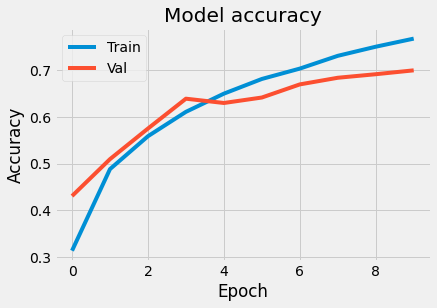

In [43]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

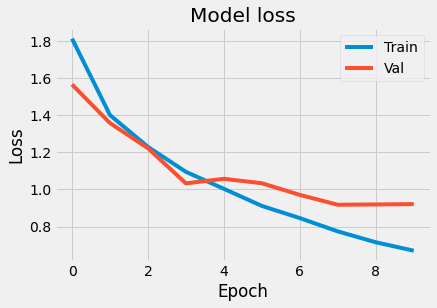

In [44]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [47]:
#load the data 
from google.colab import files 
uploaded = files.upload()
#use to load data on google colab 
new_image = plt.imread("cat.jpg") #read in the image(3,14,20)

Saving cat.jpg to cat.jpg


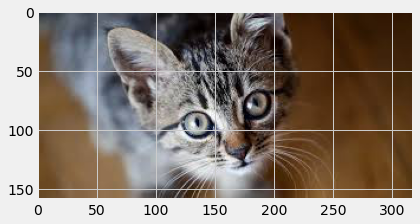

In [48]:
img = plt.imshow(new_image)

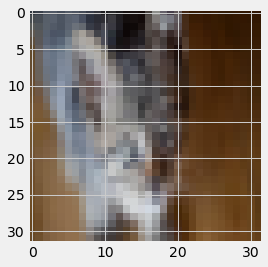

In [50]:
#resize the image to a 32 x 32 pixel image with depth = 3 and show the image 
from skimage.transform import resize 
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [51]:
#get the predictions for each class and store in a variable 
predictions = model.predict(np.array([resized_image]))

In [52]:
predictions

array([[2.7983005e-03, 3.1301918e-04, 1.4785218e-02, 7.3731905e-01,
        6.8310886e-03, 1.7752722e-01, 2.6374937e-03, 5.2359816e-02,
        5.9305219e-04, 4.8357579e-03]], dtype=float32)

In [53]:
#sort the predictions from least to greatest such that the highest probability
# is at index = 0 
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if (x[0][list_index[i]] > x[0][list_index[j]]):
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels in order from highest to lowest probability 
print(list_index)      

[3, 5, 7, 2, 4, 9, 0, 6, 8, 1]


In [54]:
i = 0 
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2),"%")

cat : 73.73 %
frog : 17.75 %
ship : 5.24 %
bird : 1.48 %
dog : 0.68 %


<h4> We can clearly see that the model was able to identiy that the picture was 73% cat </h4>

In [55]:
#to save the model 
model.save('first_model.h5')

In [56]:
#to load this later 
from keras.models import load_model 
model = load_model('first_model.h5')